# ch03.01 NLP기초 - 텍스트 처리
---

* 날짜:
* 이름:

## 학습내용
    - 텍스트 전처리 과정을 이해한다.
      * 텍스트 토큰화
      * 텍스트 인덱싱
      * 원-핫 인코딩
      * 텍스트 임베딩
    - 간단한 문장을 분류하는 딥러닝 모델을 구현한다.


```
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning
```

In [1]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 669, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 669 (delta 147), reused 188 (delta 124), pack-reused 427
Receiving objects: 100% (669/669), 37.09 MiB | 22.24 MiB/s, done.
Resolving deltas: 100% (340/340), done.


```
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/02.케라스_창시자에게_배우는_딥러닝/scripts')
from import_lib import *
```

In [2]:
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/02.케라스_창시자에게_배우는_딥러닝/scripts')
from import_lib import *

## 텍스트 데이터 처리
---

### **| 전처리 구현하기**

#### **딕셔너리 제작**
```
"문장이 이런식으로 이루어져 있습니다."
# 1. 토큰화
"문장 이 이런 식 으로 이루 어 져 있 습 니다." # -> 어떻게 토큰화 할지 라이브러리 존재
"hello everyone"
# 모든데이터는 숫자
# 모든 토큰에 대해 숫자로 매핑
# 인덱싱 위해서는 딕셔너리 필요
```

In [8]:
samples = ['very nice movie',
           'this movie is bad',
           'it is so bad',
           'wow it is a good movie']


word_dict = {}

for sample in samples:
  # 토큰화
  for token in sample.split(' '):
    #print(token)
    if token not in word_dict:
      word_dict[token]=len(word_dict)+1
print(word_dict)
print('모든 단어 개수:', len(word_dict))

{'very': 1, 'nice': 2, 'movie': 3, 'this': 4, 'is': 5, 'bad': 6, 'it': 7, 'so': 8, 'wow': 9, 'a': 10, 'good': 11}
모든 단어 개수: 11


#### **단어 인덱싱**

In [10]:
# 문장 -> 토큰 -> 숫자
def word_indexing(sample, word_dict):
  indexed=[]
  for token in sample.split(' '):
    num = word_dict[token]
    indexed.append(num)
  return np.array(indexed)
idx = 1
samples[idx], word_indexing(samples[idx], word_dict)

('this movie is bad', array([4, 3, 5, 6]))

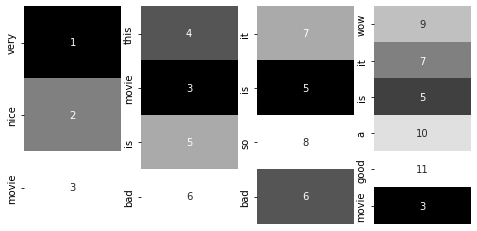

In [16]:
plt.figure(figsize=(len(samples)*2, 4))
for i, sample in enumerate(samples):
  indexed = word_indexing(sample, word_dict)
  plt.subplot(1, len(samples),i+1)
  sns.heatmap(indexed.reshape(len(indexed),1), cmap='gray', 
              annot=True, cbar=False,
              yticklabels=sample.split(' '),
              xticklabels =[])
plt.show()

#### **원-핫 인코딩**

In [26]:
# sample_mxlen : 한문장안에 몇개의 토큰까지 허락
# total_words : 딕셔너리 안에 있는 모든 단어 수
def word_onehot(sample, sample_mxlen, total_words):
  onehot = np.zeros((sample_mxlen, total_words+1))
  for i, token in enumerate(sample.split(' ')):
    if i == sample_mxlen: break # 샘플이 너무 길면 자르기
    index = word_dict[token] # 토큰이 몇번째 해당하는지 반환
    onehot[i, index]=1 #i번째 토큰, index에 해당하는 자리에 1을 부여
  return onehot

idx = 3
print(samples[idx])
print(word_indexing(samples[idx], word_dict))
print(word_onehot(samples[idx], 6, len(word_dict)))


wow it is a good movie
[ 9  7  5 10 11  3]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


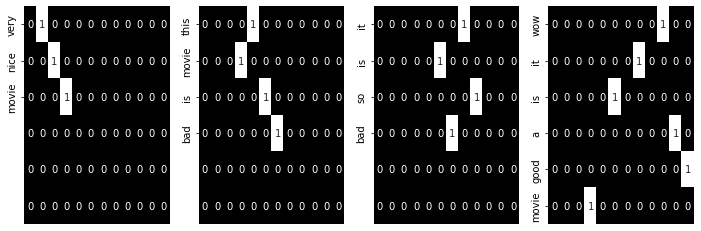

In [29]:
plt.figure(figsize=(len(samples)*3, 4))
for i, sample in enumerate(samples):
  onehot = word_onehot(samples[i], 6, len(word_dict))
  plt.subplot(1, len(samples),i+1)
  sns.heatmap(onehot, cmap='gray', 
              annot=True, cbar=False,
              yticklabels=sample.split(' '),
              xticklabels =[])
plt.show()

### | **텐서플로우 케라스 Tokenizer**


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
tk = Tokenizer()
tk.fit_on_texts(samples)

In [34]:
print('생성된 딕셔너리:', tk.word_index)
print('단어 카운트:', tk.word_counts)
print('단어 하나가 몇개의 문장에 포함되어 있는가:', tk.word_docs)
print('문장(샘플) 카운트', tk.document_count)

생성된 딕셔너리: {'movie': 1, 'is': 2, 'bad': 3, 'it': 4, 'very': 5, 'nice': 6, 'this': 7, 'so': 8, 'wow': 9, 'a': 10, 'good': 11}
단어 카운트: OrderedDict([('very', 1), ('nice', 1), ('movie', 3), ('this', 1), ('is', 3), ('bad', 2), ('it', 2), ('so', 1), ('wow', 1), ('a', 1), ('good', 1)])
단어 하나가 몇개의 문장에 포함되어 있는가: defaultdict(<class 'int'>, {'nice': 1, 'movie': 3, 'very': 1, 'bad': 2, 'this': 1, 'is': 3, 'it': 2, 'so': 1, 'wow': 1, 'a': 1, 'good': 1})
문장(샘플) 카운트 4


#### **단어 인덱싱**

In [36]:
seqs = tk.texts_to_sequences(samples)
print('단어 인덱싱 결과', seqs)

단어 인덱싱 결과 [[5, 6, 1], [7, 1, 2, 3], [4, 2, 8, 3], [9, 4, 2, 10, 11, 1]]


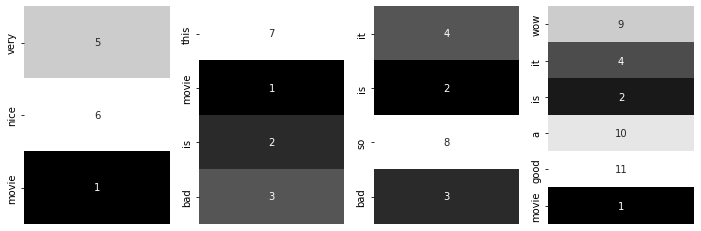

In [38]:
plt.figure(figsize=(len(samples)*3, 4))
for i, sample in enumerate(samples):
  indexed = np.array(seqs[i])
  plt.subplot(1, len(samples),i+1)
  sns.heatmap(indexed.reshape(len(indexed), 1), cmap='gray', 
              annot=True, cbar=False,
              yticklabels=sample.split(' '),
              xticklabels =[])
plt.show()

#### **패딩**

In [49]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

pads = pad_sequences(seqs, 6)
print('패딩 결과:\n', pads,'\n', pads.shape)

패딩 결과:
 [[ 0  0  0  5  6  1]
 [ 0  0  7  1  2  3]
 [ 0  0  4  2  8  3]
 [ 9  4  2 10 11  1]] 
 (4, 6)


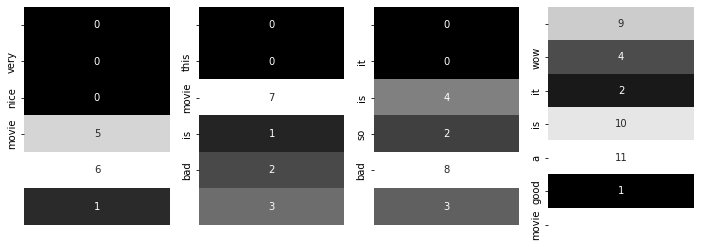

In [50]:
plt.figure(figsize=(len(samples)*3, 4))
for i, sample in enumerate(samples):
  
  plt.subplot(1, len(samples),i+1)
  sns.heatmap(pads[i].reshape(len(indexed), 1), cmap='gray', 
              annot=True, cbar=False,
              yticklabels=['']+sample.split(' '),
              xticklabels =[])
plt.show()

#### **원핫 인코딩**

In [51]:
# 인풋 시퀀스는 길이가 동일! 패딩된거 
onehots= utils.to_categorical(pads, num_classes=len(word_dict)+1) # 단어 개수 +1 해주기
# +1 하는 이유 단어가 없거나/ 딕셔너리에 존재하지 않는 단어는 첫번째 클래스에 할당
print(pads.shape, onehots.shape)

(4, 6) (4, 6, 12)


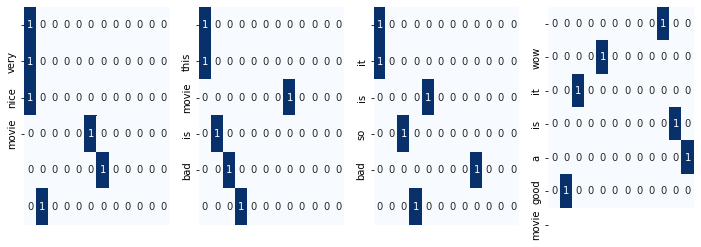

In [53]:
plt.figure(figsize=(len(samples)*3, 4))
for i, sample in enumerate(samples):
  
  plt.subplot(1, len(samples),i+1)
  sns.heatmap(onehots[i], cmap='Blues', 
              annot=True, cbar=False,
              yticklabels=['']+sample.split(' '),
              xticklabels =[])
plt.show()

#### **단어 임베딩**

In [88]:
# 인풋 패딩된 seqences
# 최대 길이 +1 하는 이유 : 처음 시작을 비워놓는거(0)
embedding_layer = layers.Embedding(input_dim=12, output_dim=3) # 원핫처리후 임베딩

In [89]:
embeded = embedding_layer(pads[0])
embeded.shape

TensorShape([6, 3])

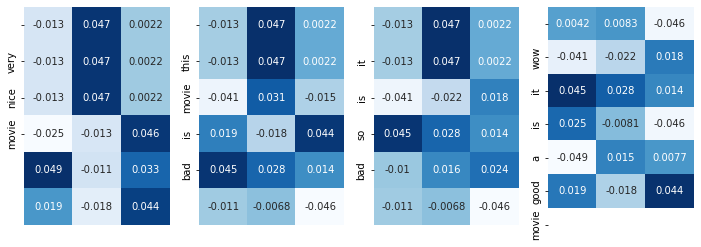

In [90]:
plt.figure(figsize=(len(samples)*3, 4))
for i, sample in enumerate(samples):
  embeded = embedding_layer(pads[i])
  plt.subplot(1, len(samples),i+1)
  sns.heatmap(embeded, cmap='Blues', 
              annot=True, cbar=False,
              yticklabels=['']+sample.split(' '),
              xticklabels =[])
plt.show()

## 간단 예제
---

### | **텍스트 전처리**

In [87]:
docs = ["너무 재미 있네요",
        "최고 예요",
        "참 잘 만든 영화 예요",
        "추천 하고 싶은 영화 입니다",
        "한번 더 보고 싶네요",
        "글쎄 요","별로 예요","생각 보다 지루 하네요",
        "연기 가 어색 해요","재미 있어서 한번 더 볼거에요", "별로 재미 가 없어요", "재미 있고 잘 만든 영화 입니다",
        "재미 가 별로 없어요", "별로 예요"]
classes = np.array([1,1,1,1,1,0,0,0,0,0,1,1,0,0]) # 긍정 1 부정 0
print(len(docs), classes.shape)

# 토큰   
token = Tokenizer()
token.fit_on_texts(docs)
print('딕셔너리:', token.word_index)
print('단어 개수',  len(token.word_index))

# 인덱싱
x = token.texts_to_sequences(docs)
print(x)
# 패딩   숫자로 바뀐 자주 쓰인 단어 횟수 기준에 따라 어디까지 패딩할 것인가
x_pad = pad_sequences(x, 6)
print('패딩 결과', x_pad)




14 (14,)
딕셔너리: {'재미': 1, '예요': 2, '별로': 3, '영화': 4, '가': 5, '잘': 6, '만든': 7, '입니다': 8, '한번': 9, '더': 10, '없어요': 11, '너무': 12, '있네요': 13, '최고': 14, '참': 15, '추천': 16, '하고': 17, '싶은': 18, '보고': 19, '싶네요': 20, '글쎄': 21, '요': 22, '생각': 23, '보다': 24, '지루': 25, '하네요': 26, '연기': 27, '어색': 28, '해요': 29, '있어서': 30, '볼거에요': 31, '있고': 32}
단어 개수 32
[[12, 1, 13], [14, 2], [15, 6, 7, 4, 2], [16, 17, 18, 4, 8], [9, 10, 19, 20], [21, 22], [3, 2], [23, 24, 25, 26], [27, 5, 28, 29], [1, 30, 9, 10, 31], [3, 1, 5, 11], [1, 32, 6, 7, 4, 8], [1, 5, 3, 11], [3, 2]]
패딩 결과 [[ 1 13]
 [14  2]
 [ 4  2]
 [ 4  8]
 [19 20]
 [21 22]
 [ 3  2]
 [25 26]
 [28 29]
 [10 31]
 [ 5 11]
 [ 4  8]
 [ 3 11]
 [ 3  2]]


### | **모델 구현 및 학습**

In [72]:
def create_model():
  x = layers.Input(shape=6)
  y = layers.Embedding(len(token.word_index)+1, 8)(x)
  y = layers.Flatten()(y)
  y = layers.Dense(1, activation='sigmoid')(y) # 이진분류
  return models.Model(x,y)
model = create_model()
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 6)]               0         
                                                                 
 embedding_4 (Embedding)     (None, 6, 8)              264       
                                                                 
 flatten_1 (Flatten)         (None, 48)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 49        
                                                                 
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['acc'])
model.fit(x_pad, classes, epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 796ms/step - loss: 0.6917 - acc: 0.6429
Epoch 2/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6895 - acc: 0.6429
Epoch 3/20
1/1 [==============================] - 0s 18ms/step - loss: 0.6873 - acc: 0.6429
Epoch 4/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6851 - acc: 0.5714
Epoch 5/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6830 - acc: 0.5714
Epoch 6/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6808 - acc: 0.7143
Epoch 7/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6786 - acc: 0.7857
Epoch 8/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6765 - acc: 0.8571
Epoch 9/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6743 - acc: 0.8571
Epoch 10/20
1/1 [==============================] - 0s 14ms/step - loss: 0.6722 - acc: 0.8571
Epoch 11/20
1/1 [==============================] - 0s 16ms/step - loss: 0.6700

### **| 예측**

In [78]:
# 0.5 기준, 0이면 부정, 1이면 긍정
preds = model.predict(x_pad)
for i in range(len(preds)):
  print(docs[i], np.round(preds[i][0]))

너무 재미 있네요 1.0
최고 예요 0.0
참 잘 만든 영화 예요 1.0
추천 하고 싶은 영화 입니다 1.0
한번 더 보고 싶네요 1.0
글쎄 요 0.0
별로 예요 0.0
생각 보다 지루 하네요 0.0
연기 가 어색 해요 0.0
재미 있어서 한번 더 볼거에요 0.0
별로 재미 가 없어요 0.0
재미 있고 잘 만든 영화 입니다 1.0
재미 가 별로 없어요 0.0
별로 예요 0.0


In [86]:
docs_test = ['생각 보다 별로 예요', '재미 있는 영화 입니다']
# 인덱싱
x_test = token.texts_to_sequences(docs_test)
print(x_test)
# 패딩(정규화)    : 문장 자르기
x_test_pad = pad_sequences(x_test, 6)
print('패딩 결과', x_test_pad)


[[23, 24, 3, 2], [1, 4, 8]]
패딩 결과 [[ 0  0 23 24  3  2]
 [ 0  0  0  1  4  8]]


In [80]:
# 0.5 기준, 0이면 부정, 1이면 긍정
preds = model.predict(x_test_pad)
for i in range(len(preds)):
  print(docs_test[i], np.round(preds[i][0]))

생각 보다 별로 예요 0.0
재미 있는 영화 입니다 1.0


In [81]:
import keras
keras.__version__

'2.8.0'

In [82]:
from keras.layers import Embedding

# Embedding 층은 적어도 두 개의 매개변수를 받습니다.
# 가능한 토큰의 개수(여기서는 1,000으로 단어 인덱스 최댓값 + 1입니다)와 임베딩 차원(여기서는 64)입니다
embedding_layer = Embedding(1000, 64)

In [83]:
from keras.datasets import imdb
from keras import preprocessing

# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
maxlen = 20

# 정수 리스트로 데이터를 로드합니다.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환합니다.
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17473536/17464789 [==============================] - 0s 0us/step


In [84]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
# 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정합니다.
model.add(Embedding(10000, 8, input_length=maxlen))
# Embedding 층의 출력 크기는 (samples, maxlen, 8)가 됩니다.

# 3D 임베딩 텐서를 (samples, maxlen * 8) 크기의 2D 텐서로 펼칩니다.
model.add(Flatten())

# 분류기를 추가합니다.
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten_2 (Flatten)         (None, 160)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 3s 3ms/step - loss: 0.6732 - acc: 0.6155 - val_loss: 0.6293 - val_acc: 0.6946
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5539 - acc: 0.7487 - val_loss: 0.5352 - val_acc: 0.7282
Epoch 3/10
625/625 [==============================] 